In [1]:
pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import tarfile
import urllib.request
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import VOCSegmentation

# Check for GPU availability and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Download and extract Pascal VOC dataset
def download_extract_voc_data(destination_folder):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    url = "http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar"
    file_name = os.path.join(destination_folder, "VOCtrainval_11-May-2012.tar")

    if not os.path.exists(file_name):
        print(f"Downloading {url} to {file_name}")
        urllib.request.urlretrieve(url, file_name)

    print("Extracting data...")
    with tarfile.open(file_name, "r") as tar:
        tar.extractall(destination_folder)
    print("Done!")

download_extract_voc_data("data")




Extracting data...
Done!


In [3]:
import torch.nn as nn

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
# Load model and move to GPU
#model = Autoencoder().cuda()
model_path = "mymodel.pt"
model = torch.load(model_path)
model.to(device)

# Prepare Pascal VOC dataset
data_path = "data/VOCdevkit/VOC2012"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])




In [6]:
#train_data = VOCSegmentation(root=data_path, year='2012', image_set='train', download=True, transform=transform, target_transform=transform)
#val_data = VOCSegmentation(root=data_path, year='2012', image_set='val', download=True, transform=transform, target_transform=transform)


In [7]:
# # Create DataLoaders
# train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_data, batch_size=32, shuffle=True)

# # Define loss and optimizer
# criterion = torch.nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Initialize the model, loss function, and optimizer

# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     for img_a, img_out in train_loader:
#         img_a = img_a.cuda()
#         img_out = img_out.repeat(1, 3, 1, 1)
#         img_out = img_out.cuda()

#         optimizer.zero_grad()

#         # Forward pass
#         outputs = model(img_a)
#         loss = criterion(outputs, img_out)

#         # Calculate the loss
#         loss = criterion(outputs, img_out)

#         # Backward pass
#         loss.backward()

#         # Update the model parameters
#         optimizer.step()

#         running_loss += loss.item()

#     # Validation
#     model.eval()
#     running_val_loss = 0.0
#     with torch.no_grad():
#         for img_a, img_out in val_loader:
#             img_a = img_a.cuda()
#             img_out = img_out.repeat(1, 3, 1, 1)
#             img_out = img_out.cuda()

#             # Forward pass
#             outputs = model(img_a)

#             # Calculate the loss
#             val_loss = criterion(outputs, img_out)
#             running_val_loss += val_loss.item()

#     # Print the average loss and validation loss for this epoch
#     print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}, Validation Loss: {running_val_loss / len(val_loader)}")

# # Save the updated model
# torch.save(model, "updated_model.pt")

100%|██████████| 1999639040/1999639040 [01:30<00:00, 22182607.13it/s]


Extracting data/VOCdevkit/VOC2012/VOCtrainval_11-May-2012.tar to data/VOCdevkit/VOC2012
torch.Size([3, 224, 224])


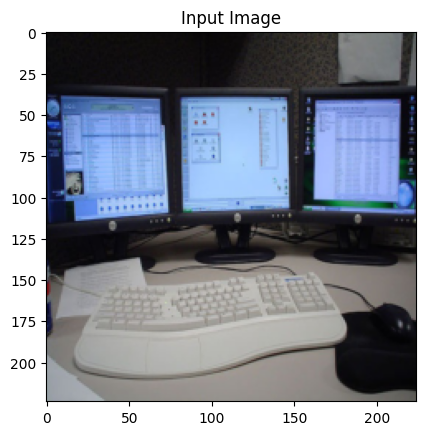

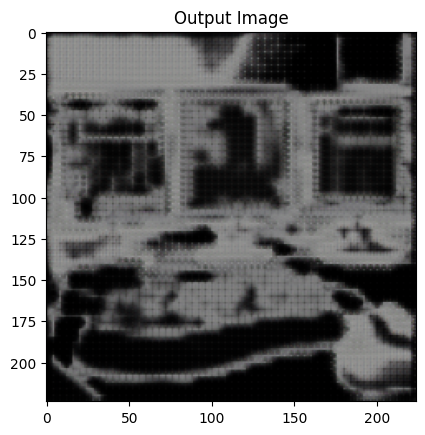

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create test set and DataLoader
test_data = VOCSegmentation(root=data_path, year='2012', image_set='val', download=True, transform=transform, target_transform=transform)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

def imshow(inp, title=None):
    """Helper function to display an image."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Randomly sample one image from the test set
inputs, targets = next(iter(test_loader))
inputs = inputs.to(device)
# Get model output
model.eval()
with torch.no_grad():
    outputs = model(inputs)
    

# Convert tensors to CPU and display input and output images
inputs, targets, outputs = inputs.cpu(), targets.cpu(), outputs.cpu()
input_image = inputs[0]
output_image = outputs[0]
print(output_image.shape)

plt.figure()
imshow(input_image, title='Input Image')
plt.figure()
imshow(output_image, title='Output Image')
plt.show()


Using downloaded and verified file: data/VOCdevkit/VOC2012/VOCtrainval_11-May-2012.tar
Extracting data/VOCdevkit/VOC2012/VOCtrainval_11-May-2012.tar to data/VOCdevkit/VOC2012


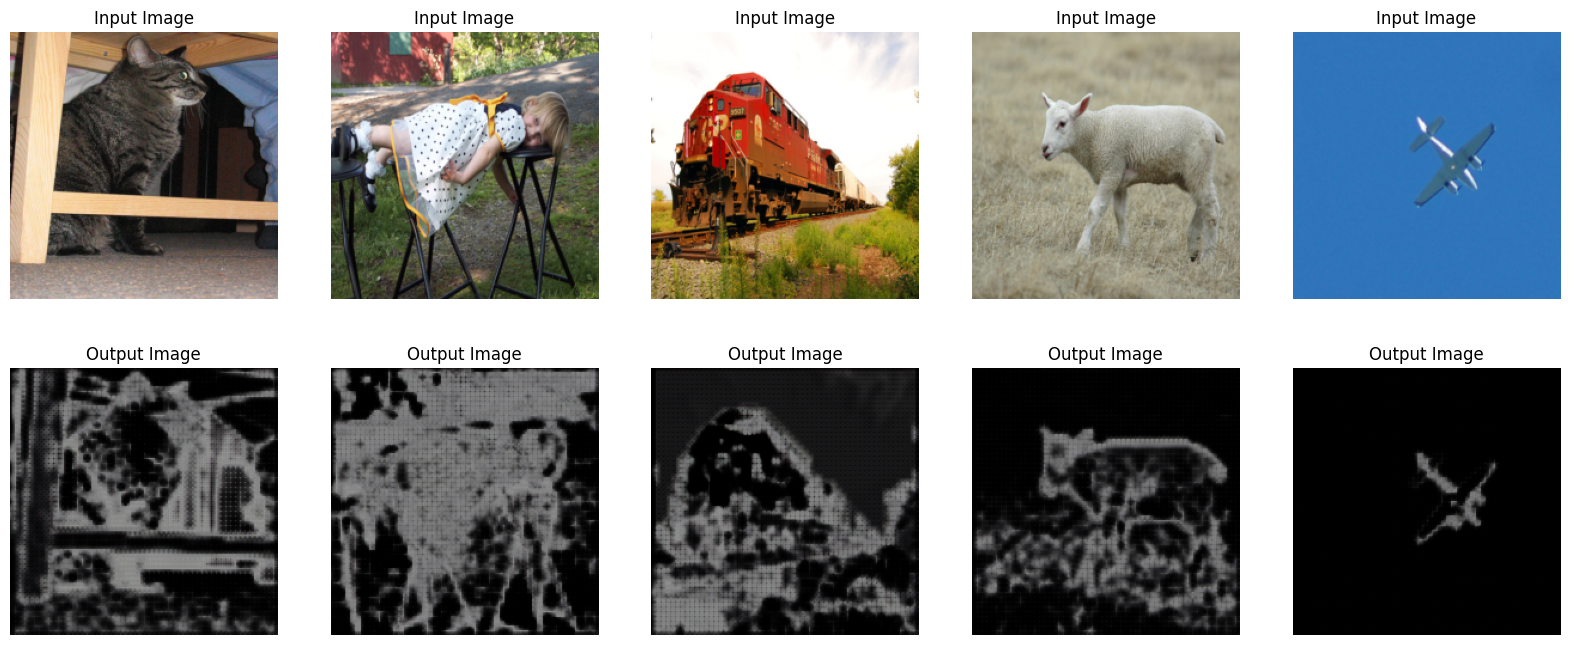

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create test set and DataLoader
test_data = VOCSegmentation(root=data_path, year='2012', image_set='val', download=True, transform=transform, target_transform=transform)
test_loader = DataLoader(test_data, batch_size=5, shuffle=True)

def imshow(inp, title=None):
    """Helper function to display an image."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Randomly sample five images from the test set
inputs, targets = next(iter(test_loader))
inputs = inputs.to(device)
# Get model output
model.eval()
with torch.no_grad():
    outputs = model(inputs)
    

# Convert tensors to CPU and display input and output images
inputs, targets, outputs = inputs.cpu(), targets.cpu(), outputs.cpu()
input_images = inputs[:5]
output_images = outputs[:5]

fig, axs = plt.subplots(2, 5, figsize=(20,8))
for i in range(5):
    axs[0,i].imshow(input_images[i].numpy().transpose((1, 2, 0)))
    axs[0,i].axis('off')
    axs[0,i].set_title('Input Image')
    axs[1,i].imshow(output_images[i].numpy().transpose((1, 2, 0)))
    axs[1,i].axis('off')
    axs[1,i].set_title('Output Image')

plt.show()
